# E-Mail Spam Classification

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import re

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier


## Reading Data

In [115]:
data=pd.read_csv('spam_ham_dataset.csv')

In [116]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [118]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [119]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

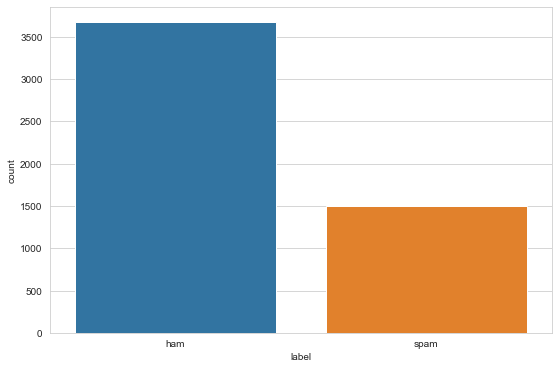

In [120]:
plt.figure(figsize = (9,6))
sns.countplot(data = df, x = 'label');

In [121]:
data.drop(['Unnamed: 0','label'],axis=1,inplace=True)

In [122]:
data.drop_duplicates(inplace=True)

In [123]:
data

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


In [124]:
data.shape

(4993, 2)

In [125]:
#Downloading the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rauf
[nltk_data]     Can\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing

In [130]:
X=data['text'].values.tolist()
y=data['label_num'].values.tolist()

In [133]:
X[2]

"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up

In [134]:
#1.Remove punctuations
#2.Split all texts into words
#3.Remove stop words in each texts
#4.Stick all words in each text.

def cleaned_data(data):
    cleaned_texts=[]
    for i in range(len(data)):
        text=re.sub("[^a-zA-Z]"," ",data[i])
        text=text.lower()
        words=word_tokenize(text)
        words=[word for word in words if not word in set(stopwords.words('english'))]
        text_final=' '.join(words)
        cleaned_texts.append(text_final)
    return cleaned_texts


In [135]:
X=cleaned_data(X)

In [141]:
#We can feed model with string inputs.We convert text into vector.So,each text will have vector notation.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X=vectorizer.fit_transform(X)

In [147]:
X.shape

(4993, 45595)

In [150]:
y=np.array(y)

# Splitting Data into Train and Test

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [152]:
print('Train data shape : {}'.format(X_train.shape))
print('Test data shape : {}'.format(X_test.shape))
print('Train label shape : {}'.format(y_train.shape))
print('Test label shape : {}'.format(y_test.shape))

Train data shape : (3994, 45595)
Test data shape : (999, 45595)
Train label shape : (3994,)
Test label shape : (999,)


# Selecting Some Models

In [155]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), SVC(kernel="rbf",random_state=15), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(random_state=15),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
     

In [156]:
models.items()

dict_items([('LogisticRegression', LogisticRegression()), ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=2)), ('SVC', SVC(random_state=15)), ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=10)), ('RandomForestClassifier', RandomForestClassifier(n_estimators=60, random_state=0)), ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=20)), ('AdaBoostClassifier', AdaBoostClassifier()), ('XGBClassifier', XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, reg_alpha=None, reg_lambda

# Fitting Some Models

In [163]:
pred_df=pd.DataFrame(columns=['model','accuracy','val_accuracy'])

accuracy,val_accuracy=[],[]

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    accuracy.append(accuracy_score(y_pred_train,y_train))
    val_accuracy.append(accuracy_score(y_pred,y_test))

pred_df['model']=models.keys()
pred_df['accuracy']=accuracy
pred_df['val_accuracy']=val_accuracy

    

C:\Users\Rauf Can\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Accuracy and Validation Accuracy Scores

In [164]:
pred_df

,model,accuracy,val_accuracy
0,LogisticRegression,0.999249,0.974975
1,KNeighborsClassifier,0.981472,0.867868
2,SVC,0.978468,0.964965
3,DecisionTreeClassifier,1.000000,0.947948
4,RandomForestClassifier,1.000000,0.970971
5,GradientBoostingClassifier,0.971457,0.951952
6,AdaBoostClassifier,0.968202,0.941942
7,XGBClassifier,0.991487,0.970971


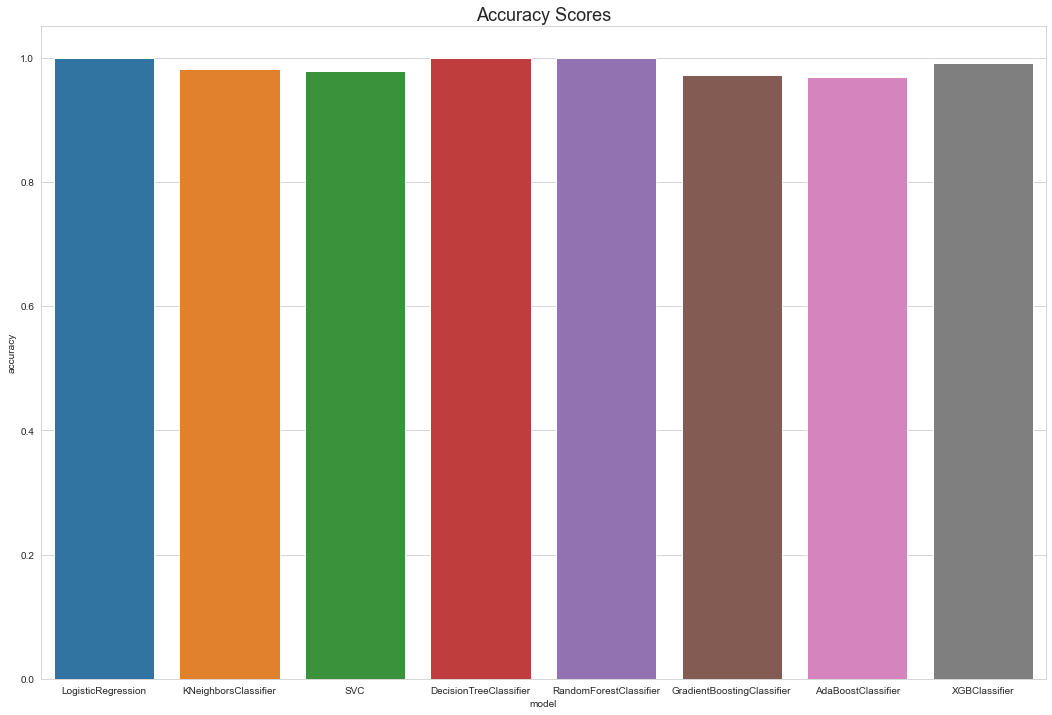

In [179]:
plt.figure(figsize=(18,12));
sns.barplot(x=pred_df['model'],y=pred_df['accuracy']);
plt.title('Accuracy Scores',fontsize=18);

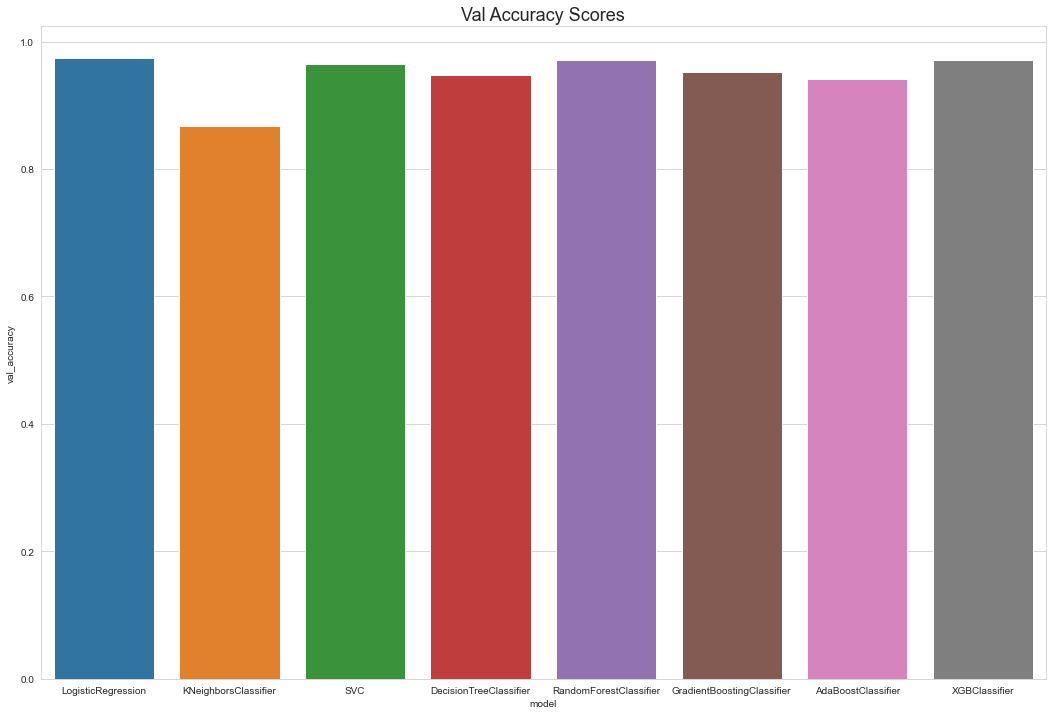

In [180]:
plt.figure(figsize=(18,12));
sns.barplot(x=pred_df['model'],y=pred_df['val_accuracy']);
plt.title('Val Accuracy Scores',fontsize=18);